In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import clustering_utils
from itertools import combinations

In [2]:
users_df = pd.read_csv("dataset/users_df_dataset_cleaned_with_indicators.csv")
users_df.dropna(inplace=True)
users_df.info(verbose=True)
users_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11108 entries, 0 to 11108
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   11108 non-null  int64  
 1   name                                      11108 non-null  object 
 2   lang                                      11108 non-null  object 
 3   bot                                       11108 non-null  int64  
 4   created_at                                11108 non-null  object 
 5   statuses_count                            11108 non-null  int64  
 6   account_age_in_days                       11108 non-null  int64  
 7   number_of_tweets                          11108 non-null  int64  
 8   account_average_tweets_per_day            11108 non-null  float64
 9   avg_tweets_per_actual_day                 11108 non-null  float64
 10  day_with_most_tweets              

,user_id,bot,statuses_count,account_age_in_days,number_of_tweets,account_average_tweets_per_day,avg_tweets_per_actual_day,max_number_of_tweets_in_a_day,entropy_for_day,entropy_for_hour,...,total_retweet_count,account_discussion_creation_ratio,tweet_num_likes_ratio,tweet_num_replies_ratio,entropy_original_text,entropy_text,mean_inactive_period_length_in_seconds,median_inactive_period_length_in_seconds,mode_inactive_period_length_in_seconds,mode_count
count,1.110800e+04,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,...,1.110800e+04,11108.000000,11108.000000,11108.000000,11108.000000,1.110800e+04,1.110800e+04,1.110800e+04,1.110800e+04,11108.000000
mean,1.263557e+09,0.550594,485.581023,1827.635938,941.462009,0.262567,13.375639,52.167267,2.795125,1.995850,...,5.260731e+05,19.516091,17.395740,4.134271,7.731713,4.480927e-06,6.240840e+05,3.192250e+05,1.657036e+05,75.145211
std,9.362939e+08,0.497456,1239.154853,555.101424,1199.280546,0.679668,37.978610,87.945867,1.459904,1.086835,...,2.930989e+06,80.966312,46.418556,29.054618,2.656620,1.077508e-05,3.885050e+06,3.610090e+06,3.235159e+06,119.629358
min,6.780330e+05,0.000000,0.000000,891.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.439497,1.321162e-07,4.300000e+01,0.000000e+00,0.000000e+00,1.000000
25%,4.662897e+08,0.000000,41.000000,1312.000000,67.000000,0.022468,1.844843,6.000000,1.426160,1.032655,...,3.000000e+00,0.001647,0.957845,0.000000,6.058814,2.710587e-07,5.758676e+04,2.400000e+01,0.000000e+00,5.000000
50%,1.127886e+09,1.000000,68.000000,1702.000000,132.000000,0.035088,4.777778,18.000000,2.921068,2.234410,...,7.650000e+01,0.040932,7.500000,0.000000,6.886985,7.783141e-07,1.116091e+05,8.410000e+02,0.000000e+00,11.000000
75%,2.356965e+09,1.000000,81.000000,2080.000000,1703.000000,0.058218,8.058232,75.000000,3.709885,2.788765,...,6.465900e+04,20.000000,20.800000,0.000000,10.492429,1.498555e-06,2.841188e+05,5.117075e+04,0.000000e+00,128.000000
max,3.164942e+09,1.000000,7226.000000,3901.000000,3668.000000,6.792821,1759.500000,2131.000000,5.706424,5.705947,...,9.638758e+07,3519.000000,2877.000000,1762.000000,11.684289,6.034724e-05,1.182533e+08,1.182533e+08,1.182533e+08,2634.000000


# K-MEANS

In [3]:
indicator_columns_users = ['account_average_tweets_per_day', 'avg_tweets_per_actual_day', 'covid19_num_of_tweets', 'avg_hashtags', 
                            'avg_text_length', 'avg_mentions', 'avg_special_char_in_text', 'avt_favorite_count', 'total_replies',
                            'avt_reply_count', 'total_retweet_count', 'account_discussion_creation_ratio', 'tweet_num_likes_ratio',
                            'tweet_num_replies_ratio']

all_possible_combinations = list(combinations(indicator_columns_users, 2))
combination = all_possible_combinations[43]

In [4]:
subset_df = users_df[list(combination)]
scaler = StandardScaler()
scaler.fit(subset_df.values)
transform_result = scaler.fit_transform(subset_df.values)

In [8]:
subset_df.isna().any()

avg_hashtags                         False
account_discussion_creation_ratio    False
dtype: bool

In [5]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100)
kmeans.fit(transform_result)

AttributeError: 'NoneType' object has no attribute 'split'

Plotting the sizes of the clusters

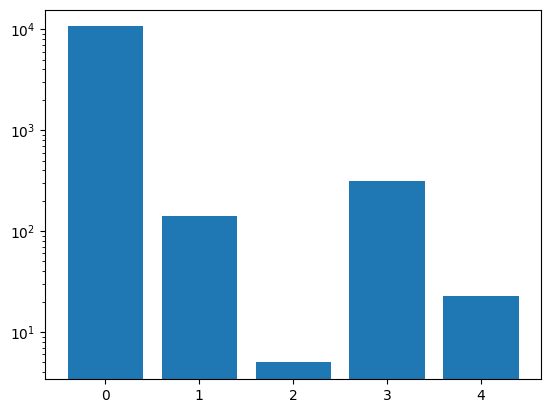

In [ ]:
clusters_id, clusters_sizes = np.unique(kmeans.labels_, return_counts=True)

plt.bar(x=clusters_id, height=clusters_sizes, log=True)
plt.show()

Plotting the distribution of bot and non-bots inside each cluster (TO BE DONE - Gianluca)

Plotting the scatterplot to show relations about the clustering attributes

('avg_hashtags', 'account_discussion_creation_ratio')


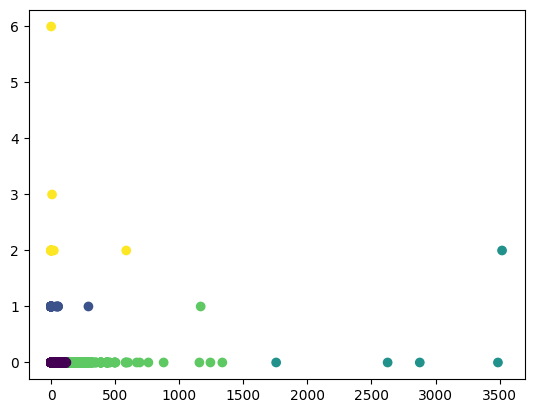

In [ ]:
plt.scatter(data=users_df, x=combination[1], y=combination[0],c=kmeans.labels_)
plt.show()

In [ ]:
clustering_utils.print_clustering_metrics(kmeans, transform_result)

SSE 3122.9412727107974
Silhouette 0.9040207411745843
Separation 0.3951739044756486



## Running multiple K-means and plotting SSE

Trying to plot the relation between K centroids and SSE. The main problem is: what indica

<AxesSubplot: xlabel='K'>

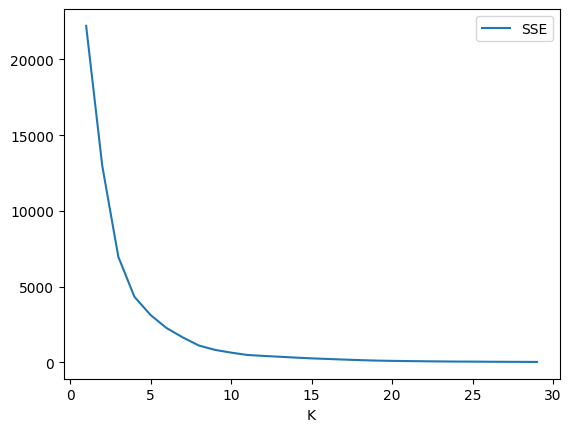

In [ ]:
results = []
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(transform_result)
    SSE = kmeans.inertia_
    results.append([k, SSE])
    
results_df = pd.DataFrame(results, columns=["K", "SSE"])
results_df.plot(x="K", y="SSE")